In [1]:
import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

In [2]:
from shared.enums import SegmentationStrategy
from utils.plot_utils import plot_image_grid
from utils.dataloader_utils import get_dataloder_from_strategy

Using device: mps
Using device: cpu


# SEGMENTATION - SegmentedDataLoader (ground truth, non dynamic)

## With background

Using device: mps
LOADED METADATA HAS LENGTH 10015
---TRAIN---: 7210 entries
---VAL---: 1803 entries
---TEST---: 1002 entries
Using device: mps
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 4827 images.
--Data Balance-- The second common class is 2 with 802 images with a difference of 4025 images from the most common class.
--Data Balance (Downsampling)-- Keeping 4827 from 0 class..
--Data Balance (Downsampling)-- 0 now has 4827 images
--Data Balance (Oversampling)-- Adding 4036 from 1 class..
--Data Balance (Oversampling)-- Adding 4592 from 3 class..
--Data Balance (Oversampling)-- Adding 4025 from 2 class..
--Data Balance (Oversampling)-- Adding 4457 from 4 class..
--Data Balance (Oversampling)-- Adding 4744 from 5 class..
--Data Balance (Oversampling)-- Adding 4725 from 6 class..


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


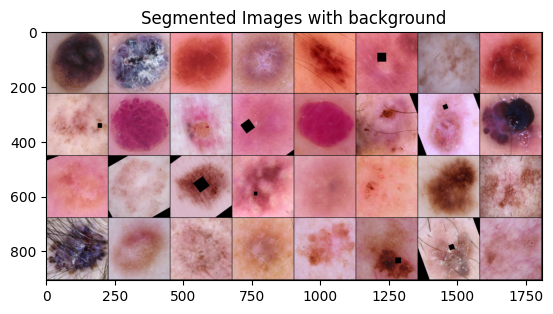

In [3]:
strategy = SegmentationStrategy.SEGMENTATION.value
dataloader = get_dataloder_from_strategy(
        strategy=strategy,
        normalize=False,
        keep_background=True)
train_dataloader = dataloader.get_train_dataloder()
batch = next(iter(train_dataloader))
images, labels = batch
plot_image_grid(images, "Segmented Images with background")


## Without Background

Using device: mps
LOADED METADATA HAS LENGTH 10015
---TRAIN---: 7210 entries
---VAL---: 1803 entries
---TEST---: 1002 entries
Using device: mps
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 4827 images.
--Data Balance-- The second common class is 2 with 802 images with a difference of 4025 images from the most common class.
--Data Balance (Downsampling)-- Keeping 4827 from 0 class..
--Data Balance (Downsampling)-- 0 now has 4827 images
--Data Balance (Oversampling)-- Adding 4036 from 1 class..
--Data Balance (Oversampling)-- Adding 4592 from 3 class..
--Data Balance (Oversampling)-- Adding 4025 from 2 class..
--Data Balance (Oversampling)-- Adding 4457 from 4 class..
--Data Balance (Oversampling)-- Adding 4744 from 5 class..
--Data Balance (Oversampling)-- Adding 4725 from 6 class..


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


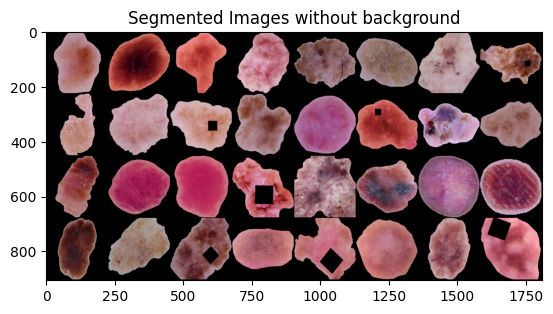

In [4]:
strategy = SegmentationStrategy.SEGMENTATION.value
dataloader = get_dataloder_from_strategy(
    strategy=strategy,
    normalize=False,
    keep_background=False)
train_dataloader = dataloader.get_train_dataloder()
batch = next(iter(train_dataloader))
images, labels = batch
plot_image_grid(images, "Segmented Images without background")

# NO_SEGMENTATION - ImagesAndLabelsDataLoader

Using device: mps
LOADED METADATA HAS LENGTH 10015
---LOADING SYNTHETIC DATA IN THE TRAINING SET---
---TRAIN---: 12650 entries
---VAL---: 1803 entries
---TEST---: 1002 entries
Using device: mps
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 4827 images.
--Data Balance-- The second common class is 1 with 1799 images with a difference of 3028 images from the most common class.
--Data Balance (Downsampling)-- Keeping 4827 from 0 class..
--Data Balance (Downsampling)-- 0 now has 4827 images
--Data Balance (Oversampling)-- Adding 3028 from 1 class..
--Data Balance (Oversampling)-- Adding 3608 from 3 class..
--Data Balance (Oversampling)-- Adding 3033 from 2 class..
--Data Balance (Oversampling)-- Adding 3449 from 4 class..
--Data Balance (Oversampling)-- Adding 4096 from 5 class..
--Data Balance (Oversampling)-- Adding 3925 from 6 class..


/Users/dov/miniconda3/envs/aml_project/lib/python3.10/site-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


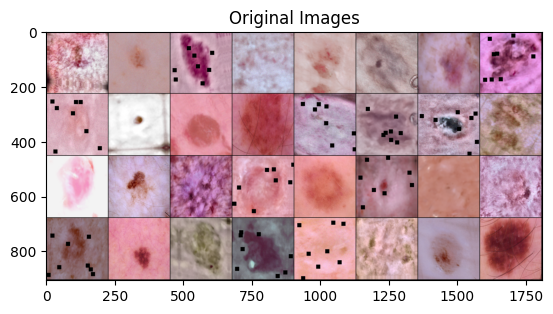

Using device: mps


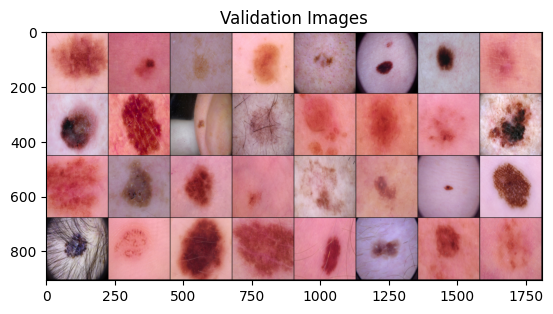

In [5]:
from dataloaders.ImagesAndSegmentationDataLoader import ImagesAndSegmentationDataLoader
from shared.constants import IMAGENET_STATISTICS

dataloader = ImagesAndSegmentationDataLoader(
    dynamic_load=True,
    load_synthetic=True,
    load_segmentations=False,
    normalize=False,
    normalization_statistics=IMAGENET_STATISTICS,
    batch_size=32,
    upscale_train=True,
)
train_dataloader = dataloader.get_train_dataloder()
batch = next(iter(train_dataloader))
images, labels = batch
plot_image_grid(images, "Original Images")
val_dataloader = dataloader.get_val_dataloader()
batch = next(iter(val_dataloader))
images, labels = batch
plot_image_grid(images, "Validation Images")

In [6]:
raise RuntimeError()

RuntimeError: 

# DYNAMIC_SEGMENTATION - DynamicSegmentationDataLoader

Note: this is pretty bugged!

## DynamicSegmentationStrategy.OPENCV

Using device: mps
LOADED METADATA HAS LENGTH 7470
---TRAIN---: 6655 entries
---VAL---: 740 entries
---TEST---: 75 entries
Using device: mps
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 4814 images.
--Data Balance-- The second common class is 1 with 647 images with a difference of 4167 images from the most common class.
--Data Balance (Undersampling)-- Keeping 4814 from 0 class..
--Data Balance (Undersampling)-- 0 now has 4814 images
--Data Balance (Oversampling)-- Adding 4611 from 3 class..
--Data Balance (Oversampling)-- Adding 4167 from 1 class..
--Data Balance (Oversampling)-- Adding 4267 from 2 class..
--Data Balance (Oversampling)-- Adding 4522 from 4 class..
--Data Balance (Oversampling)-- Adding 4727 from 6 class..
--Data Balance (Oversampling)-- Adding 4749 from 5 class..


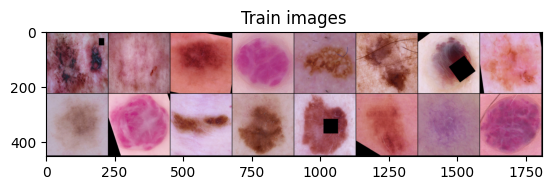

Using device: mps
Min and max of validation images 0.0011281776241958141 0.9813019633293152


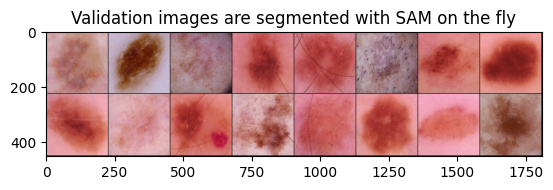

Using device: mps


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


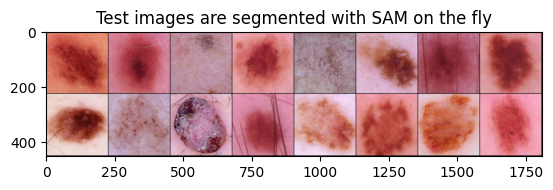

In [ ]:
from shared.enums import DynamicSegmentationStrategy


strategy = SegmentationStrategy.DYNAMIC_SEGMENTATION.value
dataloader = get_dataloder_from_strategy(
    strategy=strategy,
    dynamic_segmentation_strategy=DynamicSegmentationStrategy.SAM.value,
    normalize=False,
    batch_size=16,
    normalization_statistics=IMAGENET_STATISTICS,
    keep_background=True,)
train_dataloader = dataloader.get_train_dataloder()
batch = next(iter(train_dataloader))
images, labels = batch
plot_image_grid(images, "Train images") 
val_dataloader = dataloader.get_val_dataloader()
batch = next(iter(val_dataloader))
images, labels = batch
print(f"Min and max of validation images {images.min()} {images.max()}")
plot_image_grid(images, "Validation images are segmented with SAM on the fly")
test_dataloader = dataloader.get_test_dataloader()
batch = next(iter(test_dataloader))
images, labels = batch
plot_image_grid(images, "Test images are segmented with SAM on the fly")